Vorwort

1. Ich kann nicht programmieren, von Anfänger für Anfänger 
2. Tensorflow & Keras (drag'n'drop ML)
3. Datenset = FashionMnist (inbuilt dataset von Keras, GDrive folgt in kürze)
4. Free GPU dank Google Colab 



In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D  
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



Using TensorFlow backend.


In [0]:
# Datenset importieren
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
# wollen Datenset aufteilen in Trainings- & Testdaten sowie dem Computer sagen wie die heißen sollen
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


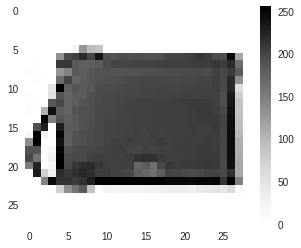

In [4]:
# Plot Funktion aus Matplotlib
plt.figure()
plt.imshow(train_images[144])
plt.colorbar()
plt.grid(False)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

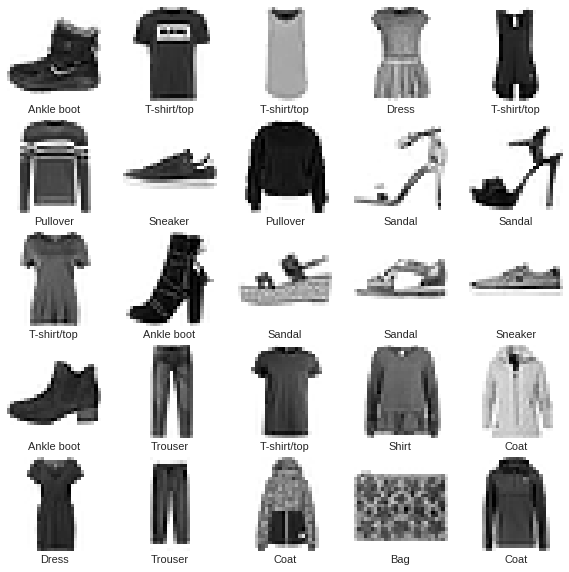

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [7]:
train_images.shape
# Graue Bilder = kein RGB => keine Channels 

(60000, 28, 28)

In [0]:
# Keras verlangt dass Bilder mit Channel eingelesen werden genauer mit (batch, height, width, channels)
# Muss meine Daten mit einer weiteren Dimension ausstatten => reshapen
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [9]:
train_images[2]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 22],
        [118],
        [ 24],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 48],
        [ 88],
        [  5],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 12],
        [100],
        [212],
        [205],
        [185],
        [179],
        [173],
        [186],
        [193],
        [221],
        [142],
        [ 85],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 85],
      

In [0]:
# Daten als Float speichern weil wir diese gleich normalisieren werden 
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')



In [11]:
train_images[2]

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [ 22.],
        [118.],
        [ 24.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [ 48.],
        [ 88.],
        [  5.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [ 12.],
        [100.],
        [212.],
        [205.],
        [185.],
        [179.],
        [173.],
        [186.],
        [193.],
        [221.],
        [142.],
        [ 85.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [0]:
# Normalisiere Trainingsdaten /255 weil es 255 verschiedene Farb-Werte gibt => Werte zwischen 0 und 1 
train_images/=255
test_images/=255

In [13]:
train_images[2]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.08627451],
        [0.4627451 ],
        [0.09411765],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.1882353 ],
        [0.34509805],
        [0.01960784],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.04705882],
        [0.39215687],
        [0.83137256],
        [0.8039216 ],
        [0.7254902 ],
        [0.7019608 ],
        [0.6784314 ],
        [0.7294118 ],
        [0.75686276],
        

In [14]:
# Überprüfe ob ich erfolgreich eine weitere Dimension hinzugefügt habe 
train_images.shape

(60000, 28, 28, 1)

In [0]:
# Jetzt will ich meine kategorialen Labels in numerische Labels umwandeln #onehotencoding
# Anzahl der Klassen 

number_of_classes = len(class_names)

In [16]:
#print(train_labels)
train_labels[5]

2

In [0]:
# Tatsächliches Umwandeln
train_labels = np_utils.to_categorical(train_labels, number_of_classes)
test_labels = np_utils.to_categorical(test_labels, number_of_classes)

In [18]:
#print(train_labels)
train_labels[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
# Baue NN
# 1. Convolutional Part 
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convout1 = Activation('relu')
model.add(convout1)

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convout2 = MaxPooling2D(pool_size=(2,2))
model.add(convout2)

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# 2. Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [20]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [0]:
# Data Augmentation = Mehr Daten = immer besser 
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:

train_generator = gen.flow(train_images, train_labels, batch_size=64)
test_generator = test_gen.flow(test_images, test_labels, batch_size=64)

In [59]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=2, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/2
937/937 [==============================] - 32s 34ms/step - loss: 0.3190 - acc: 0.8821 - val_loss: 0.2960 - val_acc: 0.8949
Epoch 2/2
937/937 [==============================] - 32s 34ms/step - loss: 0.2969 - acc: 0.8900 - val_loss: 0.3302 - val_acc: 0.8799


In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 134us/step
Test accuracy: 0.8803


In [0]:
predictions = model.predict(test_images)

In [62]:
predictions[0]

array([3.3021265e-06, 1.3898985e-07, 4.5836023e-07, 1.2846127e-07,
       2.4126280e-07, 8.7471880e-02, 2.4481059e-07, 1.6648764e-03,
       1.7470655e-06, 9.1085702e-01], dtype=float32)

In [63]:
np.argmax(predictions[0])

9

In [0]:
# choose any image to want by specifying the index
img_to_visualize = train_images[5]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

  

In [40]:
img_to_visualize.shape

(1, 28, 28, 1)

In [0]:
from keras import backend as K

In [0]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

Shape of conv: (26, 26, 32)
Shape of conv: (12, 12, 32)


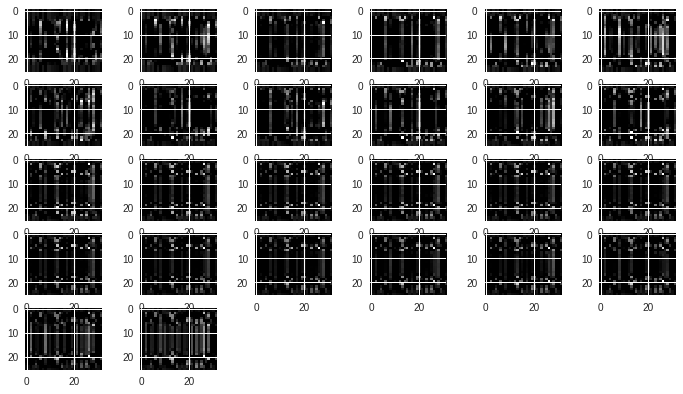

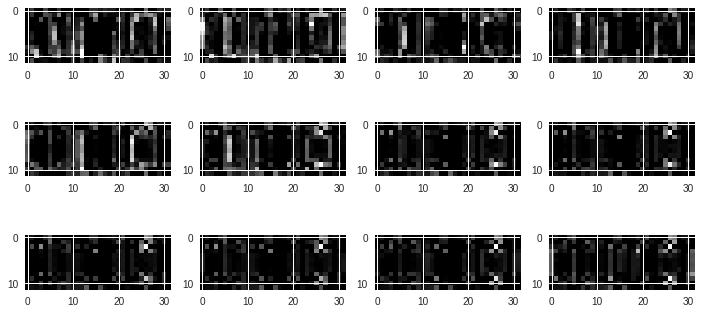

In [43]:
layer_to_visualize(convout1)

# As convout2 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced 
layer_to_visualize(convout2)